## Aggregated analysis: Country-wise trends

This notebook can be run for analysing the output of binary questions asked to a corpus of documents using LLMs. 
The questions identify technologies mentionned in PDF documents (among Clean Energy, Advanced Computing, Battery Technology and Semiconductor), the specific aspects of these technologies discusses, as well as specific skills and capabilities. Additional questions indentify whether documents mention implemented policies or investment plans for each skills and capabilities.

### Prepare notebook and import data

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np

In [6]:
# choose display colors
col1=255
col2=0.3
# 4 technologies
colors_tech = [(102/col1,194/col1,165/col1), (252/col1,141/col1,98/col1), (141/col1,160/col1,203/col1), (231/col1,138/col1,195/col1)]

# 4 technologies with country gradient

colors_tech_2country = [(102/col1,194/col1,165/col1),(102/col1-col2,194/col1-col2,165/col1-col2), (252/col1,141/col1,98/col1),(252/col1-col2,141/col1-col2,98/col1-col2), (141/col1,160/col1,203/col1),(141/col1-col2,160/col1-col2,203/col1-col2), (231/col1,138/col1,195/col1), (231/col1-col2,138/col1-col2,195/col1-col2)]

# investments and policy 
colors_pol_inv=[(184/col1,225/col1,134/col1),(253/col1,219/col1,199/col1),(239/col1,138/col1,98/col1),(178/col1,24/col1,43/col1)]

# define the techno of interest
techno=['CleanEnergy','AdvancedComputing','BatteryTechnologies','Semiconductors']
techno_text=['Clean Energy','Advanced Computing','Battery Technologies','Semiconductors']

#techno_text_rep=np.repeat(techno_text,[2,2,2,2])

techno_text_rep=['UK: Clean Energy','DE: Clean Energy','UK: Advanced Computing','DE: Advanced Computing','UK: Battery Technologies','DE: Battery Technologies','UK: Semiconductors','DE: Semiconductors']

#### Import data
To adapt using correct path

In [7]:
# read data
df_UK = pd.read_csv('../data/extended_results_all_UK.csv')
df_UK['Country_Binary']=1

df_DE = pd.read_csv('../data/extended_res_germany.csv')
df_DE['Country_Binary']=2

# concatenate the 2 DF
df=pd.concat([df_UK,df_DE])

countries=['UK','DE']

In [8]:
# Clean the df and keep only the binary columns
col_names=list(df.columns)
indices_binary = [i for i, s in enumerate(col_names) if 'Binary' in s]
df_base=df.iloc[:,indices_binary]

# useful variables
col_names=list(df_base.columns)
nb_docs_total=len(df_base.index)
print(nb_docs_total)

140


In [ ]:
# recompute the general columns based on any of the other columns being a 1 
indices_all_techno=list()
indices_all_techno_row=list()

for tech in techno:
    df_base.loc[:,tech+'_GeneralGood_Binary']= df_base.iloc[:,[i for i, s in enumerate(col_names) if tech+'_' in s and 'General' not in s and 'Policy' not in s and 'Investment' not in s]].any(axis=1)


### Overview of the documents
How many documents mention each of the 4 technologies of interest?

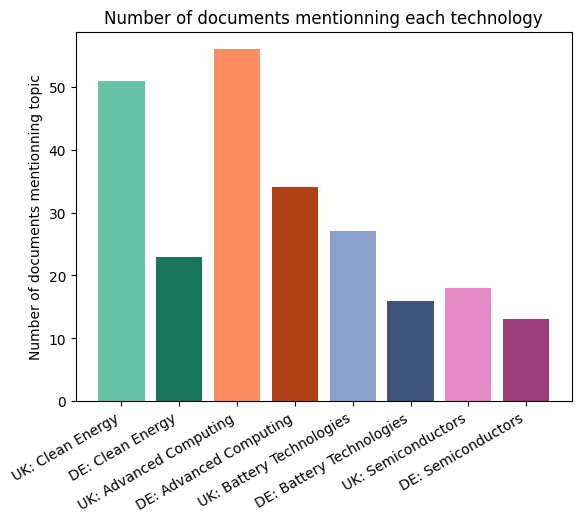

In [10]:
# count how many documents talk about each techno:
nb_docs_techno=list()
nb_docs_techno_UK=list()
nb_docs_techno_DE=list()
nb_docs_techno_all=list()
for tech in techno:
    nb_docs_techno.append((df_base[tech+'_GeneralGood_Binary'] == 1).sum()) 
    nb_docs_techno_UK.append(((df_base[tech+'_GeneralGood_Binary'] == 1) & (df_base['Country_Binary']==1)).sum())   
    nb_docs_techno_DE.append(((df_base[tech+'_GeneralGood_Binary'] == 1) & (df_base['Country_Binary']==2)).sum())   
    nb_docs_techno_all.append(((df_base[tech+'_GeneralGood_Binary'] == 1) & (df_base['Country_Binary']==1)).sum())
    nb_docs_techno_all.append(((df_base[tech+'_GeneralGood_Binary'] == 1) & (df_base['Country_Binary']==2)).sum())    
# plot the number of docs
fig, ax = plt.subplots()
ax.bar(height=nb_docs_techno_all, x=techno_text_rep, color=colors_tech_2country)
ax.set_title('Number of documents mentionning each technology')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Number of documents mentionning topic')
plt.show()


nb_docs_techno_all=[nb_docs_techno_UK,nb_docs_techno_DE]

A majoriy of documents focus on Clean Energy and Advanced Computing. 
The results concerning Battery Technology and Semiconductors may not be representative of the discourse of the country, as few documents were available for these technologies

### Analysis of subtopic
Ranking of the specific topics mentionned by documents mentionning each of the 4 identified technologies, and how often are these subtopic mentionned (for example what is the proportion of documents mentionning Clean Energy that also mention Sustainable energy).

In [11]:
# Prepare indices to extract information regarding the different themes

# find indices of capabilities and capabilities
indices_skills = [i for i, s in enumerate(col_names) if 'Skill' in s and 'General' not in s and 'Policy' not in s and 'Investment' not in s]
indices_capability = [i for i, s in enumerate(col_names) if 'Capabi' in s and 'General' not in s and 'Policy' not in s and 'Investment' not in s ]

# find indices of columns of each subtechnologies
indices_all_techno=list()
indices_all_techno_row=list()
indices_all_techno_row_UK=list()
indices_all_techno_row_DE=list()
for tech in  techno:
    # columns list
    indices_all_techno.append([i for i, s in enumerate(col_names) if tech+'_' in s and 'General' not in s and 'Policy' not in s and 'Investment' not in s])
    # also find which documents talk about the techno 
    indices_all_techno_row.append(np.where(df_base[tech+'_GeneralGood_Binary'] == 1)[0].tolist())
    indices_all_techno_row_UK.append(np.where((df_base[tech+'_GeneralGood_Binary'] == 1) & (df_base['Country_Binary'] == 1))[0].tolist())
    indices_all_techno_row_DE.append(np.where((df_base[tech+'_GeneralGood_Binary'] == 1) & (df_base['Country_Binary'] == 2))[0].tolist())

indices_all_techno_row_all=[indices_all_techno_row_UK,indices_all_techno_row_DE]

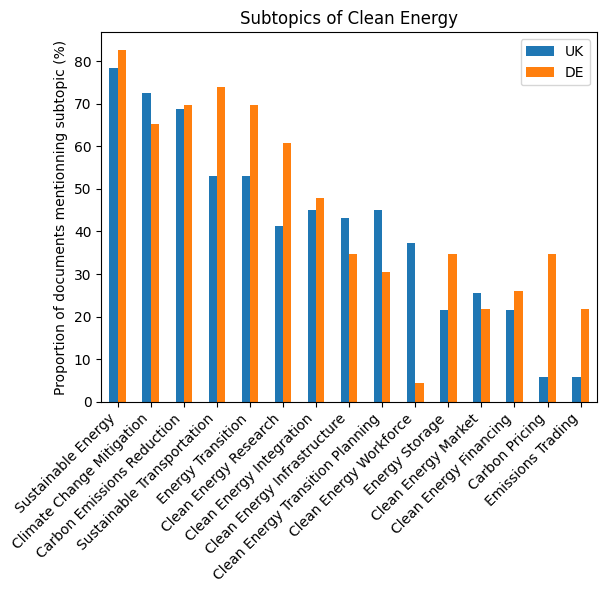

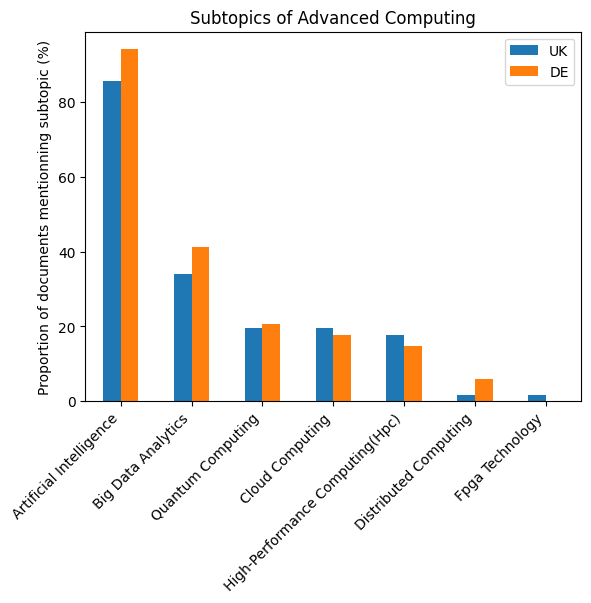

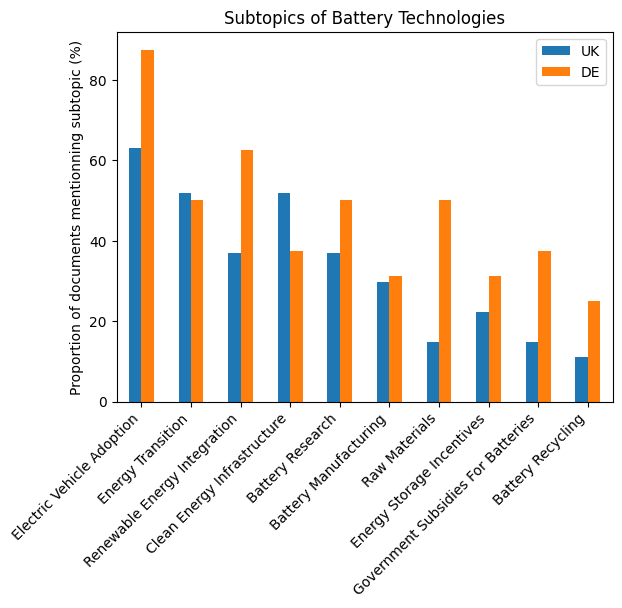

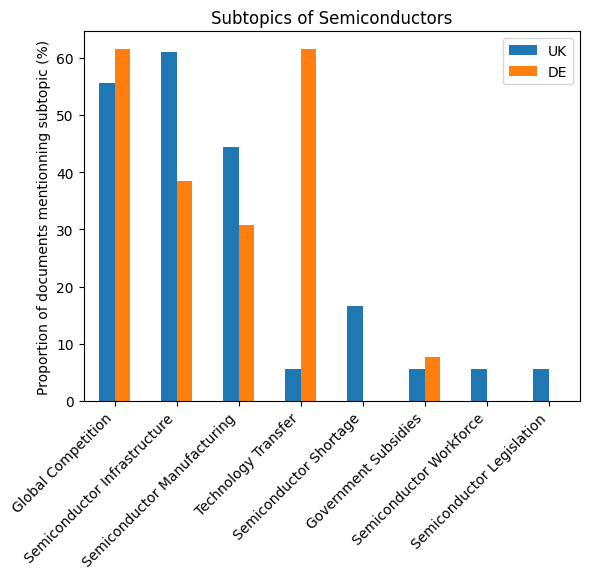

In [12]:
# print the subtechnologies associated with each techno
for i,tech in  enumerate(techno):
    summary_df=df_base.iloc[indices_all_techno_row[i],indices_all_techno[i]].describe()
    ranked_subtechno=summary_df.iloc[1,:].sort_values(ascending=False)
    ranked_all=pd.DataFrame(ranked_subtechno)

    sum_UK=df_base.iloc[indices_all_techno_row_UK[i],indices_all_techno[i]].describe()
    ranked_all['UK']=sum_UK.loc[['mean'],ranked_all.index].transpose()*100

    sum_DE=df_base.iloc[indices_all_techno_row_DE[i],indices_all_techno[i]].describe()
    ranked_all['DE']=sum_DE.loc[['mean'],ranked_all.index].transpose()*100

    # plot the subtechno ranking
    fig, ax = plt.subplots() 
    ranked_all.plot.bar(y=['UK','DE'], title='Subtopics of ' + techno_text[i],ax=ax)
    labels = ranked_all.index#[item.get_text() for item in ax.get_xticklabels()]
    labels2 = [re.sub(r"\B([A-Z])", r" \1", i.replace(tech+'_','').replace('_Binary','')) for i in labels]
    ax.set_xticklabels(labels2)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Proportion of documents mentionning subtopic (%)')
    plt.show()


### Analysis of skills
Ranking of the skills discussed by documents mentionning each of the 4 identified technologies, sorted by number of documents discussing the specific skills (for example how many documents mentionning Clean Energy also mention Technical Skills).

For each skills mentionned, additional questions were asked regarding policies implemented or investment proposed, the proportion of documents mentionning both policies and investments are displayed in green, while documents failing to mention policies, investments or both are displayed in red.

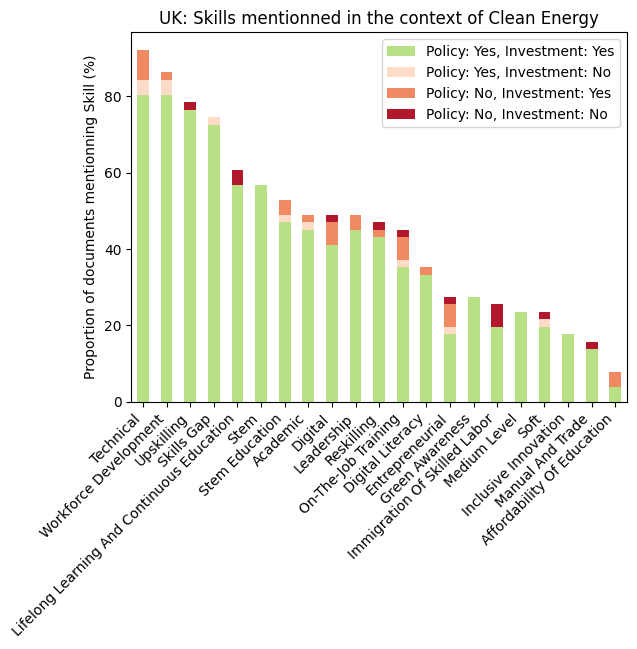

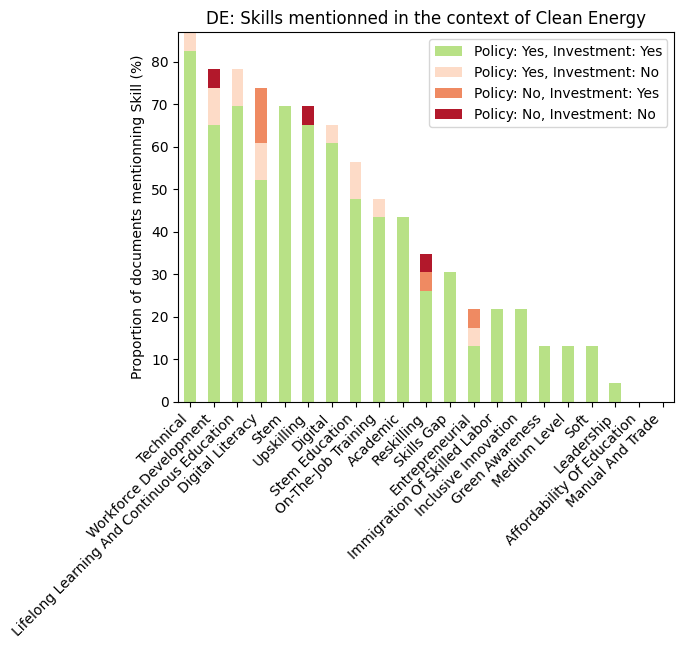

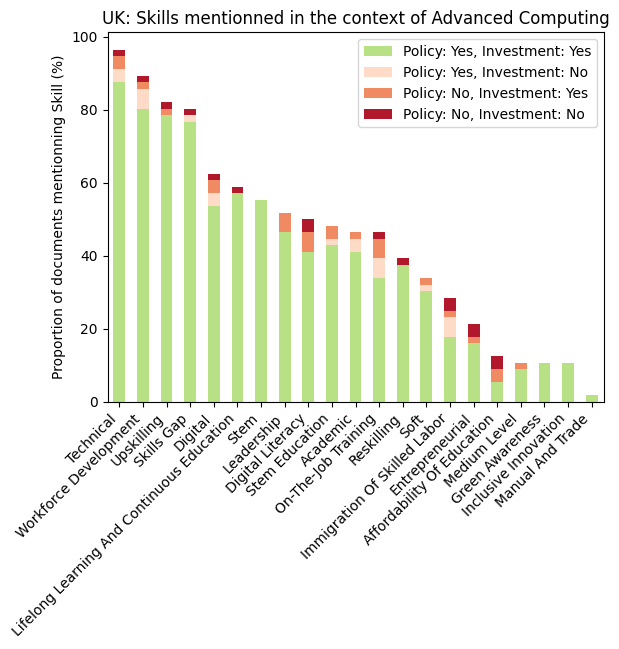

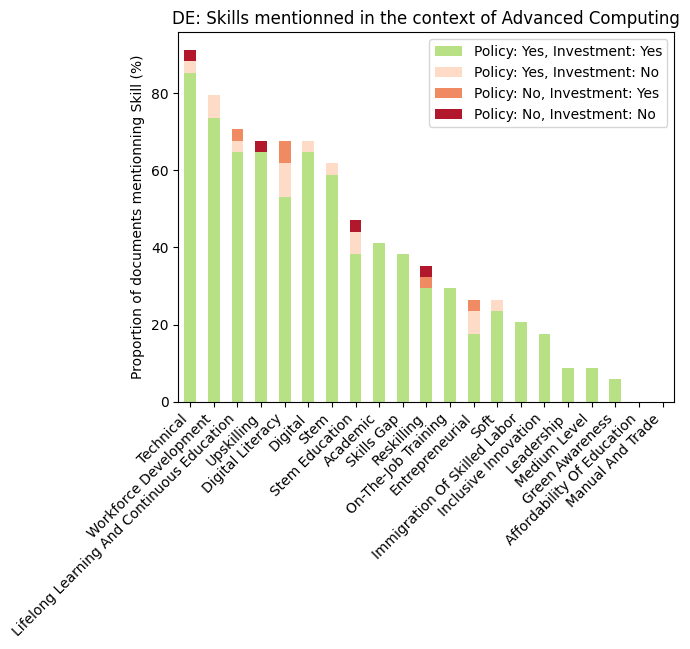

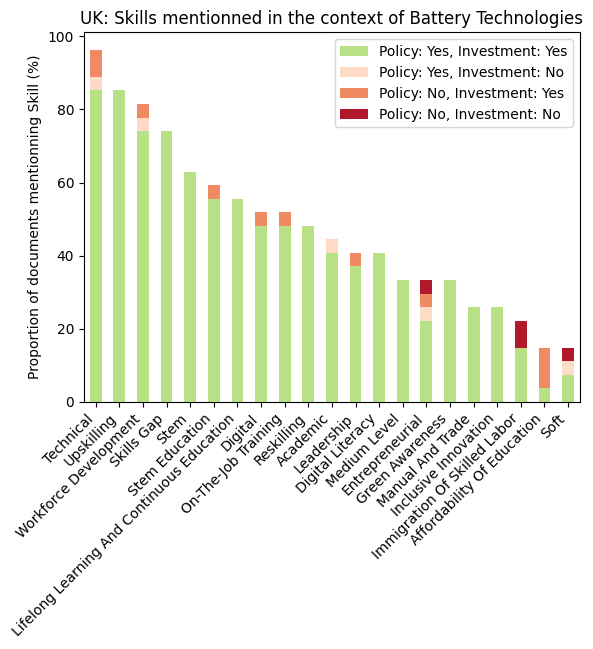

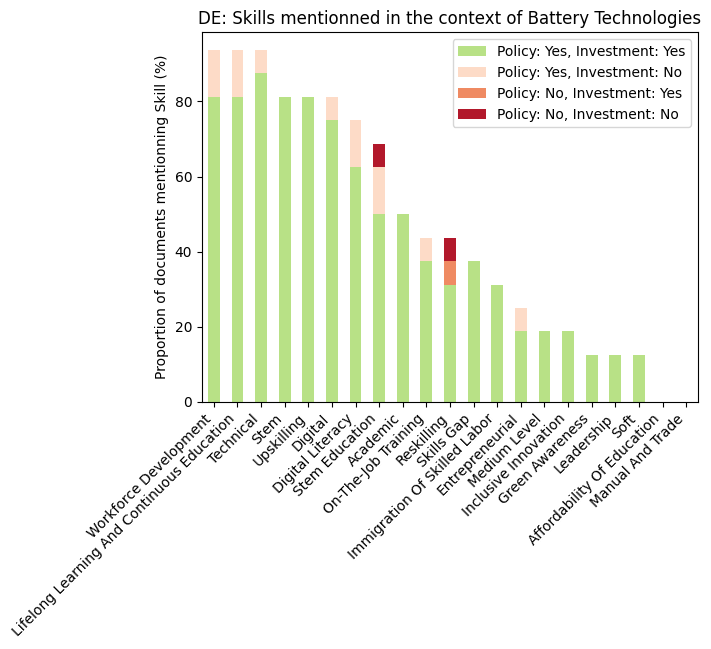

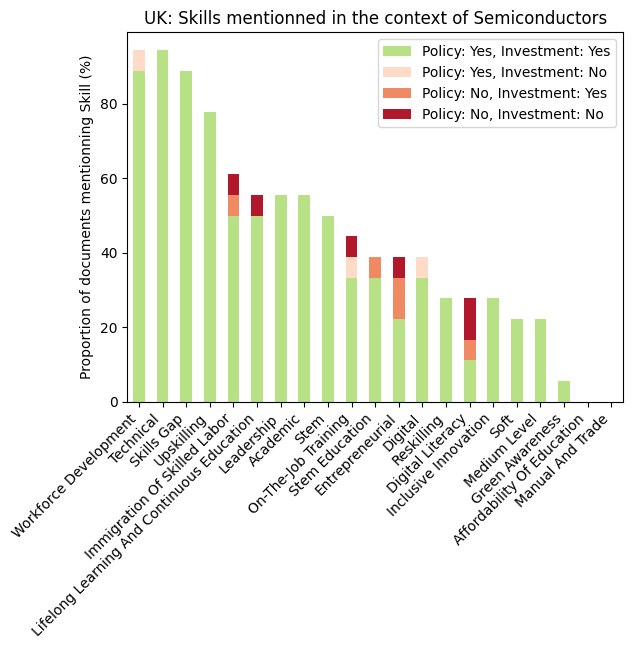

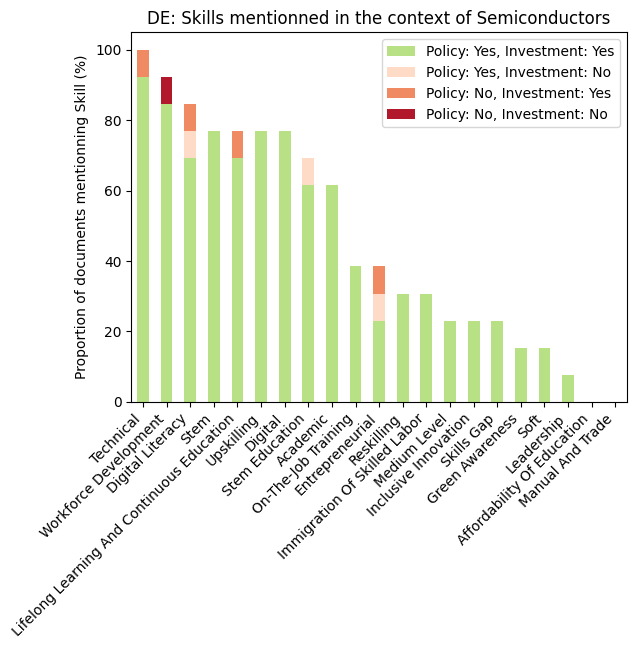

In [13]:
# print the skills associated with each techno, and color the bar by percentage of doc with a policy

for i,tech in  enumerate(techno):
    #print(tech)
    
    for country in [0,1]:

        summary_df=df_base.iloc[indices_all_techno_row_all[country][i],indices_skills].describe()
        ranked_skills=pd.DataFrame(summary_df.iloc[1,:].sort_values(ascending=False))
    
        row_names = ranked_skills.index
        row_names_use=[i.replace('_Binary','') for i in row_names]
    
        # add to DF how often a policy only, investment only, or both together are mentionned
        nb_doc_skills=list()
        nb_doc_skills_pol=list()
        nb_doc_skills_inv=list()
        nb_doc_skills_both=list()
        nb_doc_skills_none=list()
        for j,skill in enumerate(row_names_use):
            # find number of docs mentionning either policy, investment, or both
            nb_doc_skills.append(len(df_base.loc[(df_base[tech+'_GeneralGood_Binary'] == True)& (df_base[skill+'_Binary'] == True) & (df_base['Country_Binary']==country+1),:]))
            nb_doc_skills_pol.append(sum(df_base.loc[(df_base[tech+'_GeneralGood_Binary'] == True)& (df_base[skill+'_Binary'] == True) & (df_base[skill+'_Investment_Binary']==0) & (df_base['Country_Binary']==country+1),skill+'_Policy_Binary'])/nb_docs_techno_all[country][i]*100)
            nb_doc_skills_inv.append(sum(df_base.loc[(df_base[tech+'_GeneralGood_Binary'] == True)& (df_base[skill+'_Binary'] == True)& (df_base[skill+'_Policy_Binary']==0)& (df_base['Country_Binary']==country+1),skill+'_Investment_Binary'])/nb_docs_techno_all[country][i]*100)
            nb_doc_skills_both.append(sum(df_base.loc[(df_base[tech+'_GeneralGood_Binary'] == True)& (df_base[skill+'_Binary'] == True)& (df_base[skill+'_Policy_Binary']==1)& (df_base['Country_Binary']==country+1),skill+'_Investment_Binary'])/nb_docs_techno_all[country][i]*100)
            nb_doc_skills_none.append((nb_doc_skills[j]/nb_docs_techno_all[country][i]*100-nb_doc_skills_pol[j]-nb_doc_skills_inv[j]-nb_doc_skills_both[j]))
        
        # add to DF 
        #ranked_skills['nb_doc']=nb_doc_skills
        ranked_skills['Policy: Yes, Investment: Yes']=nb_doc_skills_both
        ranked_skills['Policy: Yes, Investment: No']=nb_doc_skills_pol
        
        ranked_skills['Policy: No, Investment: Yes']=nb_doc_skills_inv
        ranked_skills['Policy: No, Investment: No']=nb_doc_skills_none

        # plot the skills ranking with colorcode how often policy mentionned
        fig, ax = plt.subplots() 
        ranked_skills.plot.bar(y=['Policy: Yes, Investment: Yes','Policy: Yes, Investment: No','Policy: No, Investment: Yes','Policy: No, Investment: No'],stacked=True,title=countries[country]+': Skills mentionned in the context of ' + techno_text[i],ax=ax,color=colors_pol_inv)
        labels = ranked_skills.index#[item.get_text() for item in ax.get_xticklabels()]
        labels2 = [re.sub(r"\B([A-Z])", r" \1", i.replace('Skills_','').replace('_','').replace('Binary','')) for i in labels]
        ax.set_xticklabels(labels2)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Proportion of documents mentionning Skill (%)')
        plt.show()

### Analysis of capabilities
Ranking of the capabilities discussed by documents mentionning each of the 4 identified technologies, by frequency of mention of these capabilities(for example how many documents mentionning Clean Energy also mention Research-Industry Collaboration).

For each capability mentionned, additional questions were asked regarding policies implemented or investment proposed, the proportion of documents mentionning both policies and investments are displayed in green, while documents failing to mention policies, investments or both are displayed in red.

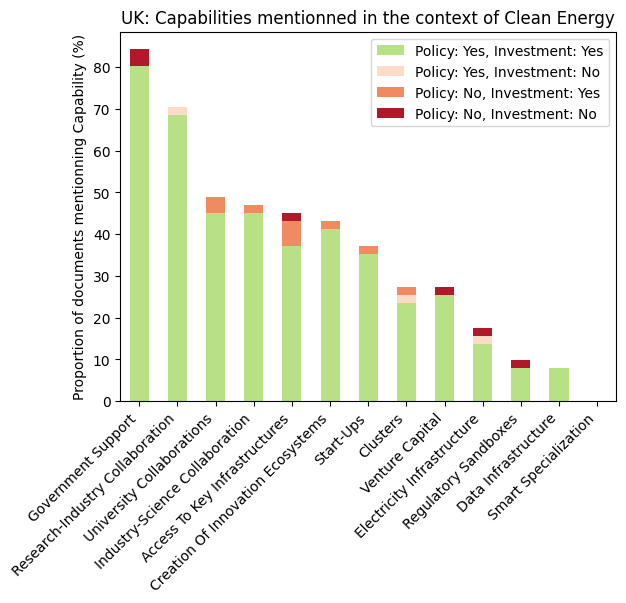

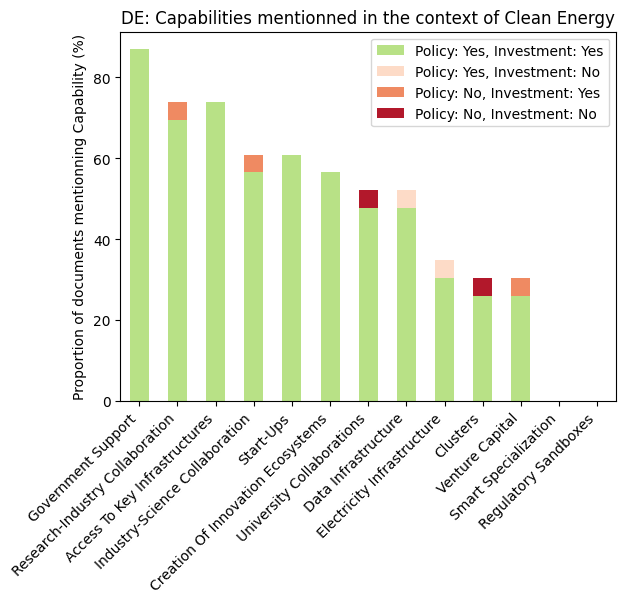

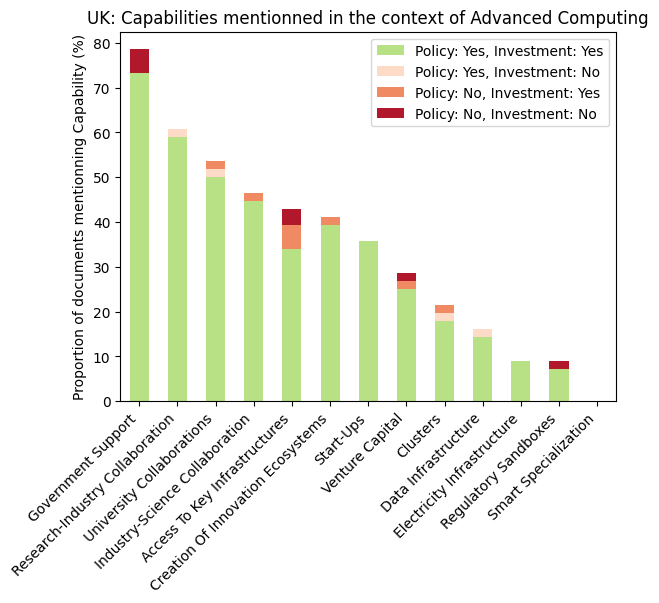

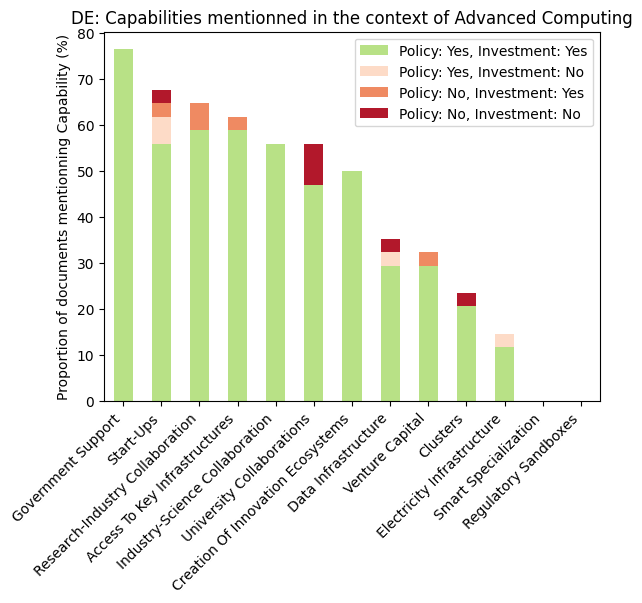

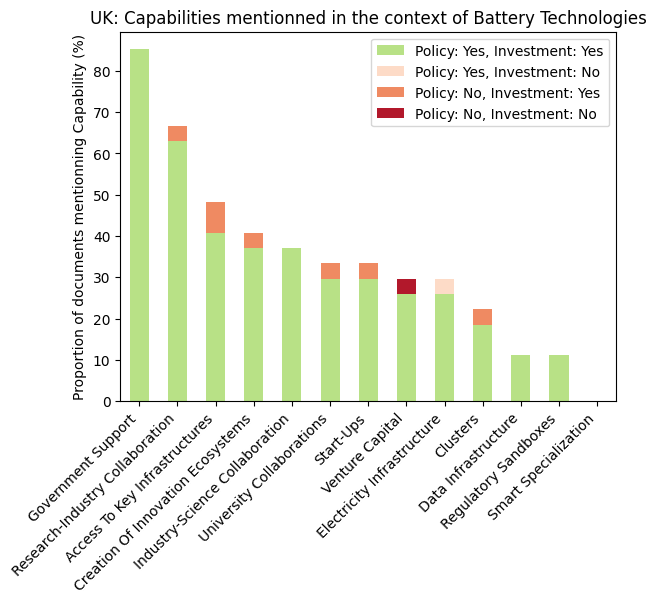

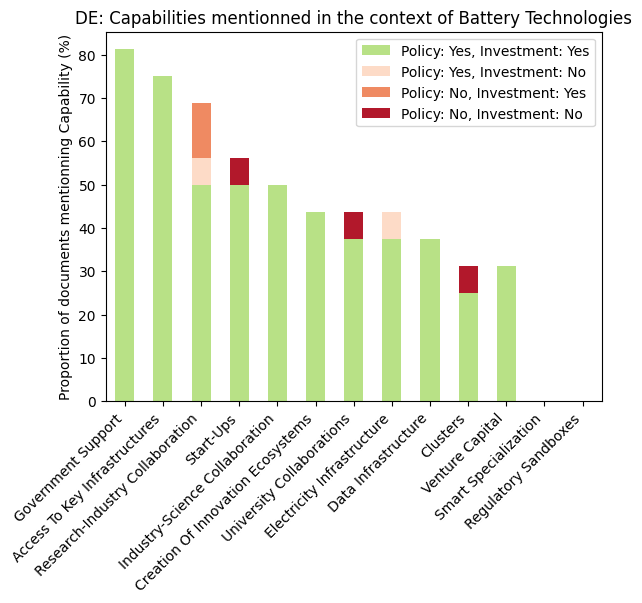

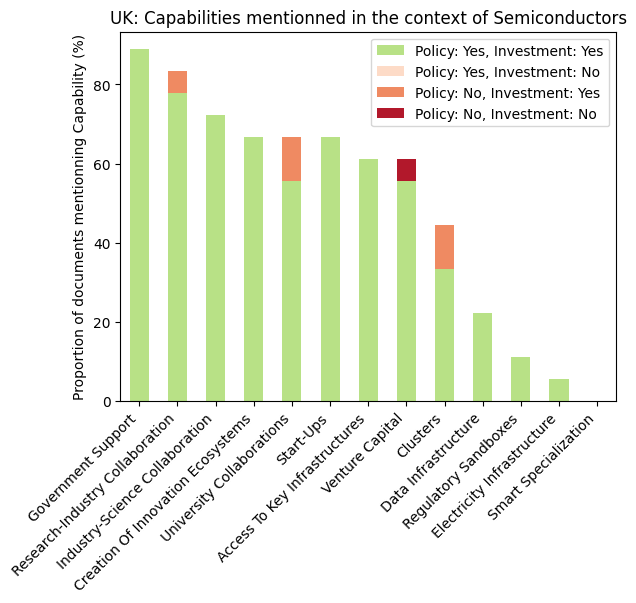

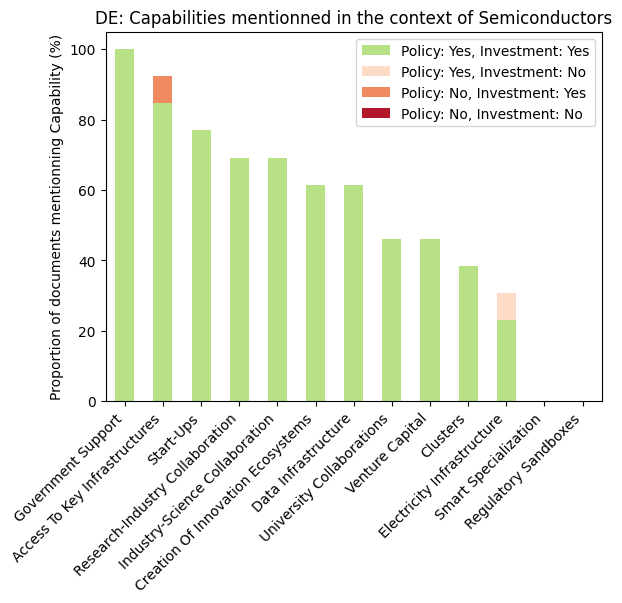

In [14]:
# print the capabilities associated with each techno, and color the bar by percentage of doc with a policy

for i,tech in  enumerate(techno):
    #print(tech)
    
    for country in [0,1]:

        summary_df=df_base.iloc[indices_all_techno_row_all[country][i],indices_capability].describe()
        ranked_capabilities=pd.DataFrame(summary_df.iloc[1,:].sort_values(ascending=False))
    
        row_names = ranked_capabilities.index
        row_names_use=[i.replace('_Binary','') for i in row_names]
    
        # add to DF how often a policy only, investment only, or both together are mentionned
        nb_doc_capabilities=list()
        nb_doc_capabilities_pol=list()
        nb_doc_capabilities_inv=list()
        nb_doc_capabilities_both=list()
        nb_doc_capabilities_none=list()
        for j,capability in enumerate(row_names_use):
            # find number of docs mentionning either policy, investment, or both
            nb_doc_capabilities.append(len(df_base.loc[(df_base[tech+'_GeneralGood_Binary'] == True)& (df_base[capability+'_Binary'] == True) & (df_base['Country_Binary']==country+1),:]))
            nb_doc_capabilities_pol.append(sum(df_base.loc[(df_base[tech+'_GeneralGood_Binary'] == True)& (df_base[capability+'_Binary'] == True) & (df_base[capability+'_Investment_Binary']==0) & (df_base['Country_Binary']==country+1),capability+'_Policy_Binary'])/nb_docs_techno_all[country][i]*100)
            nb_doc_capabilities_inv.append(sum(df_base.loc[(df_base[tech+'_GeneralGood_Binary'] == True)& (df_base[capability+'_Binary'] == True)& (df_base[capability+'_Policy_Binary']==0)& (df_base['Country_Binary']==country+1),capability+'_Investment_Binary'])/nb_docs_techno_all[country][i]*100)
            nb_doc_capabilities_both.append(sum(df_base.loc[(df_base[tech+'_GeneralGood_Binary'] == True)& (df_base[capability+'_Binary'] == True)& (df_base[capability+'_Policy_Binary']==1)& (df_base['Country_Binary']==country+1),capability+'_Investment_Binary'])/nb_docs_techno_all[country][i]*100)
            nb_doc_capabilities_none.append((nb_doc_capabilities[j]/nb_docs_techno_all[country][i]*100-nb_doc_capabilities_pol[j]-nb_doc_capabilities_inv[j]-nb_doc_capabilities_both[j]))
        
        # add to DF 
        #ranked_capabilities['nb_doc']=nb_doc_capabilities
        ranked_capabilities['Policy: Yes, Investment: Yes']=nb_doc_capabilities_both
        ranked_capabilities['Policy: Yes, Investment: No']=nb_doc_capabilities_pol
        
        ranked_capabilities['Policy: No, Investment: Yes']=nb_doc_capabilities_inv
        ranked_capabilities['Policy: No, Investment: No']=nb_doc_capabilities_none

        # plot the capabilities ranking with colorcode how often policy mentionned
        fig, ax = plt.subplots() 
        ranked_capabilities.plot.bar(y=['Policy: Yes, Investment: Yes','Policy: Yes, Investment: No','Policy: No, Investment: Yes','Policy: No, Investment: No'],stacked=True,title=countries[country]+': Capabilities mentionned in the context of ' + techno_text[i],ax=ax,color=colors_pol_inv)
        labels = ranked_capabilities.index#[item.get_text() for item in ax.get_xticklabels()]
        labels2 = [re.sub(r"\B([A-Z])", r" \1", i.replace('Capabilities_','').replace('_','').replace('Binary','')) for i in labels]
        ax.set_xticklabels(labels2)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Proportion of documents mentionning Capability (%)')
        plt.show()
